In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv(r"C:\Users\manju\Downloads\Housing.csv")
df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [88]:
df.describe()


,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  544 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.isnull().sum()


area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    1
price               0
dtype: int64

In [4]:
df.dropna(inplace = True)


In [5]:
df.isnull().sum()


area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

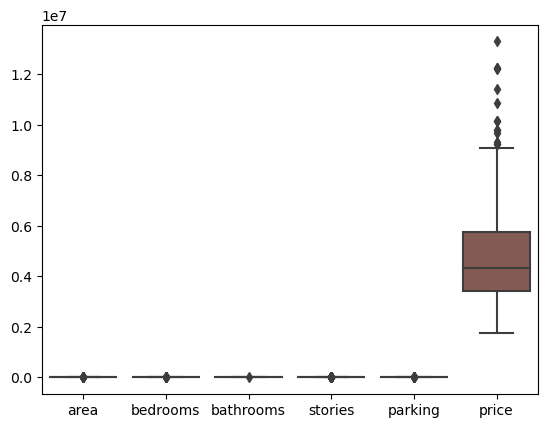

In [93]:
sns.boxplot(df)
plt.show()

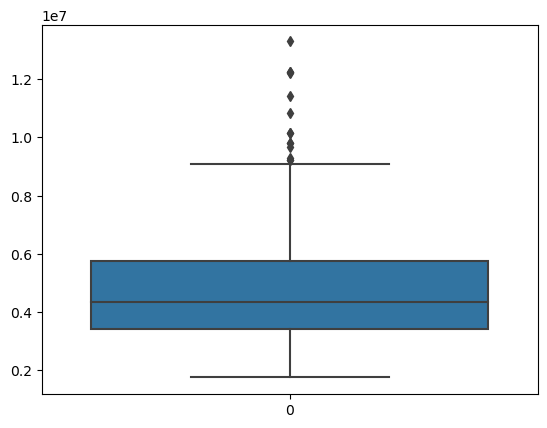

In [94]:
sns.boxplot(df['price'])
plt.show()

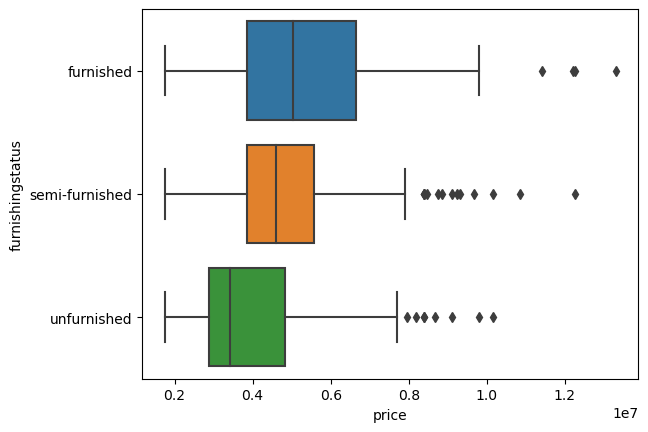

In [95]:
sns.boxplot(data=df,x = 'price',y = 'furnishingstatus')
plt.show()

In [96]:
df[(df['furnishingstatus'] == 'furnished') & (df['price']>11000000)]


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [97]:
df.drop([0,1,3],inplace = True)


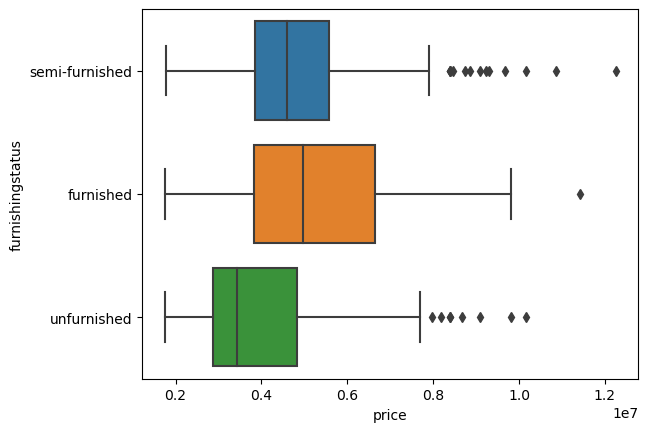

In [98]:
sns.boxplot(data=df,x = 'price',y = 'furnishingstatus')
plt.show()


In [99]:
df[(df['furnishingstatus'] == 'unfurnished') & (df['price'] >= 8000000)]


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,10150000
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000
16,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,9100000
21,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished,8680000
28,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished,8400000
30,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished,8400000
33,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished,8190000


In [100]:
df.drop([7,9,16,21,28,30,33],inplace=True)

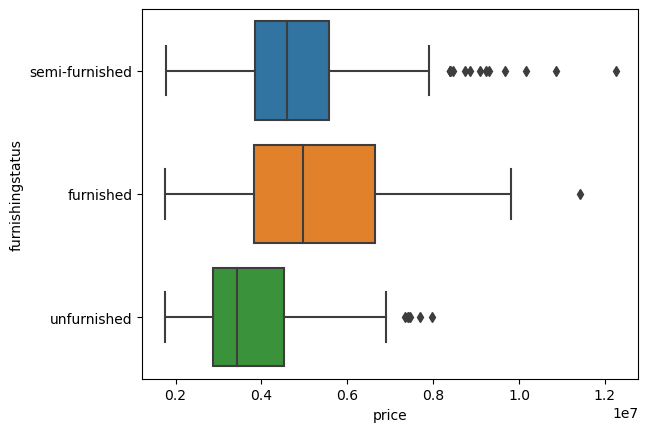

In [101]:
sns.boxplot(data=df,x = 'price',y = 'furnishingstatus')
plt.show()


In [102]:
df.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [103]:
df['mainroad'] = df['mainroad'].astype('category')
df['mainroad'] = df['mainroad'].cat.codes

In [104]:
df['guestroom'] = df['guestroom'].astype('category')
df['guestroom'] = df['guestroom'].cat.codes

In [105]:
df['basement'] = df['basement'].astype('category')
df['basement'] = df['basement'].cat.codes

In [106]:
df['hotwaterheating'] = df['hotwaterheating'].astype('category')
df['hotwaterheating'] = df['hotwaterheating'].cat.codes

In [107]:
df['airconditioning'] = df['airconditioning'].astype('category')
df['airconditioning'] = df['airconditioning'].cat.codes

In [108]:
df['prefarea'] = df['prefarea'].astype('category')
df['prefarea'] = df['prefarea'].cat.codes

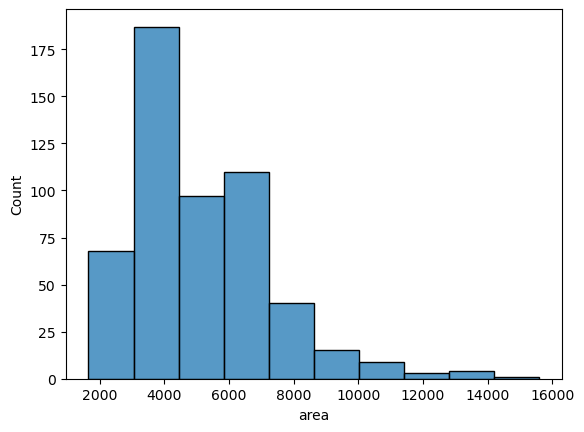

In [109]:
sns.histplot(df['area'],bins =10 )
plt.show()

In [110]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12250000
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,11410000
5,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,10850000
6,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,10150000
10,13200,3,1,2,1,0,1,0,1,2,1,furnished,9800000


In [111]:
df['furnishingstatus'] = df['furnishingstatus'].astype('category')
df['furnishingstatus'] = df['furnishingstatus'].cat.codes

In [112]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000
4,7420,4,1,2,1,1,1,0,1,2,0,0,11410000
5,7500,3,3,1,1,0,1,0,1,2,1,1,10850000
6,8580,4,3,4,1,0,0,0,1,2,1,1,10150000
10,13200,3,1,2,1,0,1,0,1,2,1,0,9800000


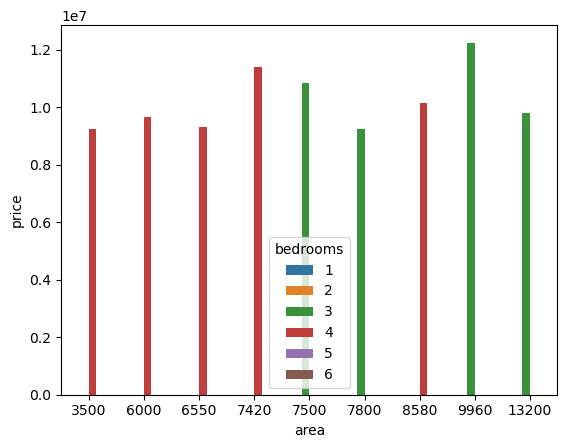

In [113]:
sns.barplot(x=df['area'][0:9],y=df['price'][0:9],hue = df['bedrooms'])
plt.show()

In [114]:
x = df.drop(['price'],axis =1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [115]:
cat = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le =LabelEncoder()
for fu in cat:
    df[fu] = le.fit_transform(df[fu])
    

In [116]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [117]:
predictions = model.predict(x_test)
print("Predictions:", predictions)

Predictions: [4983952.64086781 3283011.94517265 4552884.91810057 4086465.72211414
 2221239.39342019 4171499.39848373 2839322.72525162 6081761.26795912
 2842826.47892885 5401452.65726881 3553117.0807033  7983866.54101805
 2567052.8214036  3618918.08511033 6267670.58552978 3035953.09683986
 3382894.02612257 4004599.27578813 3678662.91711148 7077088.62019846
 5576394.20134842 4847539.07271851 4951924.42080382 4547063.92542446
 6237983.51764532 3052015.74305088 3797377.42035924 2512800.55365242
 6772858.57994242 6498942.22617221 4094572.93525481 6828137.81170983
 4349168.33611601 3107611.50589904 7863976.78192969 6365866.41479679
 3960911.27623595 5397236.43754906 4295756.4398069  4876792.93459652
 4721201.91512156 5498266.44040384 4452143.32510708 5868870.62735902
 6489027.44716351 3196707.16817341 4504206.33026845 5858377.44993138
 3675067.66352787 6216918.46969146 3217536.10105845 3942768.1405718
 8713454.10113697 3103427.94871194 4118614.11564176 5410408.91031943
 4855579.2350145  6566

In [118]:
score = model.score(x_test, y_test)
print("R^2 Score:", score)

R^2 Score: 0.5869178221192497
